## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765
0:	learn: 0.9793830	total: 47.6ms	remaining: 47.6s
1:	learn: 0.9582303	total: 48.5ms	remaining: 24.2s
2:	learn: 0.9353695	total: 49.4ms	remaining: 16.4s
3:	learn: 0.9161608	total: 50.3ms	remaining: 12.5s
4:	learn: 0.8990488	total: 51.1ms	remaining: 10.2s
5:	learn: 0.8832373	total: 52ms	remaining: 8.61s
6:	learn: 0.8650817	total: 52.8ms	remaining: 7.49s
7:	learn: 0.8477194	total: 53.6ms	remaining: 6.65s
8:	learn: 0.8311338	total: 54.4ms	remaining: 6s
9:	learn: 0.8132347	total: 55.4ms	remaining: 5.48s
10:	learn: 0.7953546	total: 56.2ms	remaining: 5.05s
11:	learn: 0.7796915	total: 57.2ms	remaining: 4.71s
12:	learn: 0.7641617	total: 58.2ms	remaining: 4.42s
13:	learn: 0.7484061	total: 59.1ms	remaining: 4.16s
14:	learn: 0.7353909	total: 59.9ms	remaining: 3.93s
15:	learn: 0.7199546	total: 60.8ms	remaining: 3.74s
16:	learn: 0.7058790	total: 61.6ms	remaining: 3.56s
17:	learn: 0.6928959	total: 62.4ms	remaining: 3.41s
18:	learn: 0.6802797	total: 63.4ms	remaining: 3.2

118:	learn: 0.2751476	total: 148ms	remaining: 1.09s
119:	learn: 0.2742685	total: 149ms	remaining: 1.09s
120:	learn: 0.2732505	total: 150ms	remaining: 1.09s
121:	learn: 0.2722779	total: 151ms	remaining: 1.08s
122:	learn: 0.2706818	total: 152ms	remaining: 1.08s
123:	learn: 0.2699505	total: 152ms	remaining: 1.08s
124:	learn: 0.2691699	total: 153ms	remaining: 1.07s
125:	learn: 0.2678759	total: 154ms	remaining: 1.07s
126:	learn: 0.2667829	total: 155ms	remaining: 1.07s
127:	learn: 0.2658124	total: 156ms	remaining: 1.06s
128:	learn: 0.2648855	total: 157ms	remaining: 1.06s
129:	learn: 0.2641466	total: 158ms	remaining: 1.05s
130:	learn: 0.2633410	total: 158ms	remaining: 1.05s
131:	learn: 0.2621334	total: 160ms	remaining: 1.05s
132:	learn: 0.2614823	total: 160ms	remaining: 1.04s
133:	learn: 0.2601560	total: 161ms	remaining: 1.04s
134:	learn: 0.2595334	total: 162ms	remaining: 1.04s
135:	learn: 0.2587113	total: 163ms	remaining: 1.03s
136:	learn: 0.2582149	total: 164ms	remaining: 1.03s
137:	learn: 

283:	learn: 0.1789390	total: 287ms	remaining: 723ms
284:	learn: 0.1785633	total: 288ms	remaining: 722ms
285:	learn: 0.1781925	total: 289ms	remaining: 721ms
286:	learn: 0.1777819	total: 290ms	remaining: 719ms
287:	learn: 0.1773282	total: 291ms	remaining: 719ms
288:	learn: 0.1769502	total: 292ms	remaining: 717ms
289:	learn: 0.1766256	total: 292ms	remaining: 716ms
290:	learn: 0.1762818	total: 293ms	remaining: 715ms
291:	learn: 0.1759812	total: 294ms	remaining: 713ms
292:	learn: 0.1756654	total: 295ms	remaining: 712ms
293:	learn: 0.1753518	total: 296ms	remaining: 711ms
294:	learn: 0.1750510	total: 297ms	remaining: 710ms
295:	learn: 0.1746660	total: 298ms	remaining: 708ms
296:	learn: 0.1743698	total: 299ms	remaining: 707ms
297:	learn: 0.1741036	total: 300ms	remaining: 706ms
298:	learn: 0.1738863	total: 300ms	remaining: 704ms
299:	learn: 0.1735892	total: 301ms	remaining: 703ms
300:	learn: 0.1731943	total: 302ms	remaining: 702ms
301:	learn: 0.1728469	total: 303ms	remaining: 700ms
302:	learn: 

449:	learn: 0.1332987	total: 426ms	remaining: 520ms
450:	learn: 0.1331067	total: 427ms	remaining: 519ms
451:	learn: 0.1328279	total: 428ms	remaining: 519ms
452:	learn: 0.1325780	total: 429ms	remaining: 518ms
453:	learn: 0.1323446	total: 429ms	remaining: 517ms
454:	learn: 0.1320852	total: 430ms	remaining: 515ms
455:	learn: 0.1318339	total: 431ms	remaining: 514ms
456:	learn: 0.1315433	total: 432ms	remaining: 513ms
457:	learn: 0.1313653	total: 433ms	remaining: 512ms
458:	learn: 0.1311582	total: 434ms	remaining: 511ms
459:	learn: 0.1311057	total: 434ms	remaining: 510ms
460:	learn: 0.1308018	total: 435ms	remaining: 509ms
461:	learn: 0.1305158	total: 436ms	remaining: 508ms
462:	learn: 0.1303462	total: 437ms	remaining: 507ms
463:	learn: 0.1302185	total: 438ms	remaining: 506ms
464:	learn: 0.1299137	total: 439ms	remaining: 505ms
465:	learn: 0.1297525	total: 439ms	remaining: 504ms
466:	learn: 0.1295942	total: 440ms	remaining: 502ms
467:	learn: 0.1293930	total: 441ms	remaining: 501ms
468:	learn: 

615:	learn: 0.1045011	total: 565ms	remaining: 352ms
616:	learn: 0.1042943	total: 566ms	remaining: 351ms
617:	learn: 0.1041832	total: 567ms	remaining: 350ms
618:	learn: 0.1039080	total: 568ms	remaining: 349ms
619:	learn: 0.1037869	total: 568ms	remaining: 348ms
620:	learn: 0.1035367	total: 569ms	remaining: 347ms
621:	learn: 0.1033841	total: 570ms	remaining: 347ms
622:	learn: 0.1031655	total: 571ms	remaining: 346ms
623:	learn: 0.1030696	total: 572ms	remaining: 345ms
624:	learn: 0.1029540	total: 573ms	remaining: 344ms
625:	learn: 0.1027401	total: 574ms	remaining: 343ms
626:	learn: 0.1026158	total: 575ms	remaining: 342ms
627:	learn: 0.1023986	total: 575ms	remaining: 341ms
628:	learn: 0.1023034	total: 576ms	remaining: 340ms
629:	learn: 0.1022044	total: 577ms	remaining: 339ms
630:	learn: 0.1020323	total: 578ms	remaining: 338ms
631:	learn: 0.1018872	total: 579ms	remaining: 337ms
632:	learn: 0.1017226	total: 579ms	remaining: 336ms
633:	learn: 0.1014919	total: 580ms	remaining: 335ms
634:	learn: 

780:	learn: 0.0826788	total: 703ms	remaining: 197ms
781:	learn: 0.0825667	total: 704ms	remaining: 196ms
782:	learn: 0.0824181	total: 705ms	remaining: 195ms
783:	learn: 0.0823330	total: 706ms	remaining: 194ms
784:	learn: 0.0822373	total: 707ms	remaining: 194ms
785:	learn: 0.0821668	total: 708ms	remaining: 193ms
786:	learn: 0.0821512	total: 708ms	remaining: 192ms
787:	learn: 0.0819865	total: 709ms	remaining: 191ms
788:	learn: 0.0818589	total: 710ms	remaining: 190ms
789:	learn: 0.0817495	total: 711ms	remaining: 189ms
790:	learn: 0.0816488	total: 712ms	remaining: 188ms
791:	learn: 0.0815988	total: 713ms	remaining: 187ms
792:	learn: 0.0815440	total: 713ms	remaining: 186ms
793:	learn: 0.0814621	total: 714ms	remaining: 185ms
794:	learn: 0.0813325	total: 715ms	remaining: 184ms
795:	learn: 0.0812950	total: 716ms	remaining: 183ms
796:	learn: 0.0812315	total: 717ms	remaining: 183ms
797:	learn: 0.0810291	total: 718ms	remaining: 182ms
798:	learn: 0.0809826	total: 719ms	remaining: 181ms
799:	learn: 

943:	learn: 0.0674273	total: 840ms	remaining: 49.8ms
944:	learn: 0.0673276	total: 841ms	remaining: 49ms
945:	learn: 0.0672887	total: 842ms	remaining: 48.1ms
946:	learn: 0.0671654	total: 843ms	remaining: 47.2ms
947:	learn: 0.0670323	total: 844ms	remaining: 46.3ms
948:	learn: 0.0669246	total: 845ms	remaining: 45.4ms
949:	learn: 0.0669036	total: 846ms	remaining: 44.5ms
950:	learn: 0.0668343	total: 847ms	remaining: 43.6ms
951:	learn: 0.0667582	total: 847ms	remaining: 42.7ms
952:	learn: 0.0667001	total: 848ms	remaining: 41.8ms
953:	learn: 0.0665747	total: 849ms	remaining: 40.9ms
954:	learn: 0.0665482	total: 850ms	remaining: 40ms
955:	learn: 0.0664565	total: 851ms	remaining: 39.2ms
956:	learn: 0.0663957	total: 852ms	remaining: 38.3ms
957:	learn: 0.0662733	total: 852ms	remaining: 37.4ms
958:	learn: 0.0661413	total: 853ms	remaining: 36.5ms
959:	learn: 0.0660855	total: 854ms	remaining: 35.6ms
960:	learn: 0.0659838	total: 855ms	remaining: 34.7ms
961:	learn: 0.0659437	total: 856ms	remaining: 33.8

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

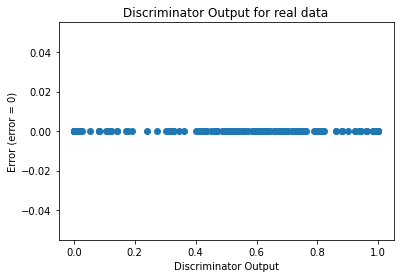

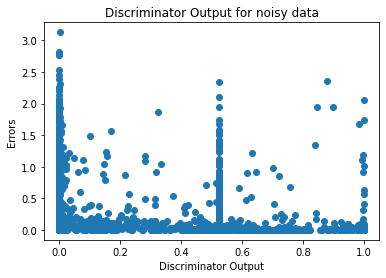

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

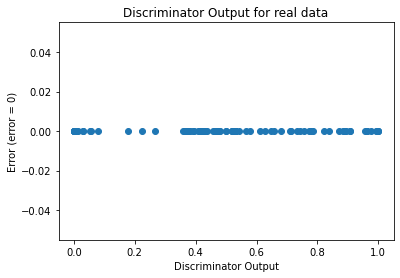

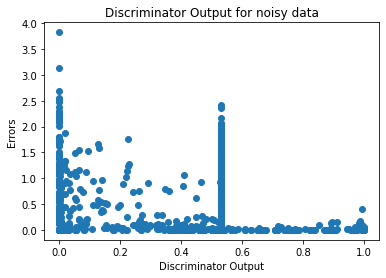

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9656]], device='cuda:0', requires_grad=True)
